In [240]:
import urllib
import pandas as pd
import collections
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import seaborn as sns
%matplotlib inline

In [5]:
testfile = urllib.URLopener()
testfile.retrieve("https://raw.githubusercontent.com/slarrain/MachineLearning/master/project/cases_55-15.csv", "cases_55-15.csv")

('cases_55-15.csv', <httplib.HTTPMessage instance at 0x033EC850>)

In [11]:
df_facts = pd.read_table('cases_55-15.csv',sep='|')

In [259]:
df_facts['year'].unique()

array([ 1956.,  1957.,  1958.,  1959.,  1960.,  1961.,  1962.,  1963.,
        1964.,  1965.,  1966.,  1967.,  1968.,  1969.,  1971.,  1970.,
        1972.,  1973.,  1974.,  1975.,  1976.,  1977.,  1978.,  1979.,
        1980.,  1981.,  1982.,  1983.,  1984.,  1985.,  1986.,  1987.,
        1988.,  1989.,  1990.,  1991.,  1992.,  1993.,  1994.,  1995.,
        1996.,  1997.,  1998.,  1999.,  2000.,  2001.,  2002.,  2003.,
        2004.,  2005.,  2006.,  2007.,  2008.,  2009.,  2010.,  2011.,
        2012.,  2013.,    nan,  2014.,  2015.,  2016.])

In [151]:
df_issues = {'issueArea':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
             'issueAreaText':['criminal procedure','civil rights','First Ammendment','due process',
                             'privacy','attorney or gov officials compensation','unions','economic activity',
                              'judicial power','federalism','interstate relation','federal taxation',
                              'misc','private law']}
df1 = pd.merge(pd.DataFrame.from_dict(df_issues),df,left_on='issueArea',right_on='issueArea')

In [119]:
df['justiceName'].unique()

array(['HHBurton', 'RHJackson', 'WODouglas', 'FFrankfurter', 'SFReed',
       'HLBlack', 'WBRutledge', 'FMurphy', 'FMVinson', 'TCClark',
       'SMinton', 'EWarren', 'JHarlan2', 'WJBrennan', 'CEWhittaker',
       'PStewart', 'BRWhite', 'AJGoldberg', 'AFortas', 'TMarshall',
       'WEBurger', 'HABlackmun', 'LFPowell', 'WHRehnquist', 'JPStevens',
       'SDOConnor', 'AScalia', 'AMKennedy', 'DHSouter', 'CThomas',
       'RBGinsburg', 'SGBreyer', 'JGRoberts', 'SAAlito', 'SSotomayor',
       'EKagan'], dtype=object)

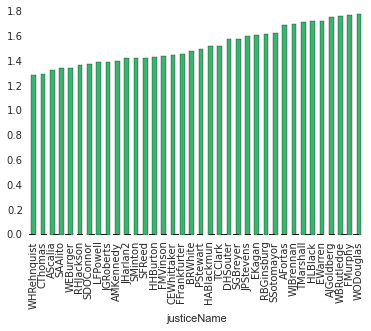

In [261]:
df[ df['direction'].isin([1,2]) ].groupby('justiceName')['direction'].mean().sort(inplace=False).plot(kind='bar',color='mediumseagreen')

In [202]:
recent_judges = ['JPStevens','SDOConnor', 'AScalia', 'AMKennedy', 'EKagan', 'CThomas','RBGinsburg', 'SGBreyer', 'JGRoberts', 'SAAlito', 'SSotomayor']
recent_judges = ['AScalia', 'AMKennedy', 'EKagan', 'CThomas','RBGinsburg', 'SGBreyer', 'JGRoberts', 'SAAlito', 'SSotomayor']
df[ ( df['justiceName'].isin(recent_judges) )& (df['direction'].isin([1,2]))  ].groupby(['justiceName','issueArea'])['direction'].mean()

justiceName  issueArea
AMKennedy    1            1.329502
             2            1.354098
             3            1.367601
             4            1.462185
             5            1.222222
             6            1.450980
             7            1.357143
             8            1.482143
             9            1.411765
             10           1.472574
             11           1.000000
             12           1.819444
             13           1.833333
AScalia      1            1.277136
             2            1.242199
...
SGBreyer     11           1.000000
             12           1.772727
             13           1.333333
SSotomayor   1            1.641379
             2            1.655172
             3            1.700000
             4            1.722222
             5            1.230769
             6            1.692308
             7            1.642857
             8            1.558333
             9            1.647059
             10           1.

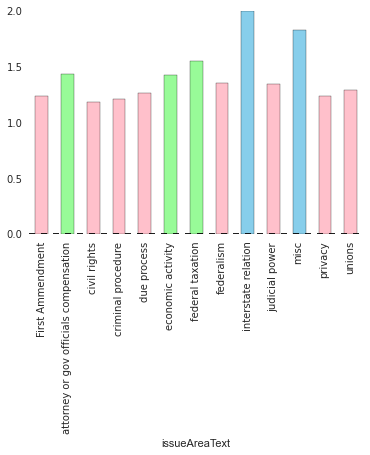

In [258]:
#df[ ( df['justiceName']=='EKagan' )& (df['decisionDirection'].isin([1,2]))  ].groupby('issueArea')['decisionDirection'].mean().plot(kind='bar')
person = df1[ ( df1['justiceName']=='CThomas' )& (df1['direction'].isin([1,2]))  ].groupby('issueAreaText')['direction'].mean()
colors=[]
for val in person.values.tolist():
    if val>1.6:
        colors.append('skyblue')
    elif val<1.4:
        colors.append('pink')
    else:
        colors.append('palegreen')
person.plot(kind='bar',color=colors )

In [217]:
df1[ ( df1['justiceName']=='AScalia' )& (df1['direction'].isin([1,2]))  ].groupby('issueAreaText')['direction'].mean()

issueAreaText
First Ammendment                          1.232955
attorney or gov officials compensation    1.350877
civil rights                              1.242199
criminal procedure                        1.277136
due process                               1.313333
economic activity                         1.488235
federal taxation                          1.640449
federalism                                1.420074
interstate relation                       2.000000
judicial power                            1.322344
misc                                      1.500000
privacy                                   1.208333
unions                                    1.303797
Name: direction, dtype: float64

In [237]:
df[ df['justiceName']=='SSotomayor' ]['direction']

111132     1
111141     1
111150     2
111159     1
111168     2
111177     2
111186     1
111195     1
111204     2
111213     2
111222   NaN
111231     2
111240     2
111249     1
111258   NaN
...
116351    2
116360    2
116369    1
116378    2
116387    2
116396    2
116405    2
116414    2
116423    2
116432    2
116441    2
116450    2
116459    1
116468    2
116477    1
Name: direction, Length: 595, dtype: float64

In [242]:
#df[ df['justiceName'].isin(recent_judges) & (df['decisionDirection'].isin([1,2])) ]
dfp = df[ df['justiceName'].isin(recent_judges) & (df['decisionDirection'].isin([1,2])) ].pivot_table('direction','docket','justiceName')

df[ df['justiceName'].isin(recent_judges) & (df['decisionDirection'].isin([1,2])) ].pivot_table('direction','docket','justiceName').corr()
#df[ df['justiceName'].isin(recent_judges) & (df['decisionDirection'].isin([1,2])) ].pivot(index='voteId',columns='justiceName',values='direction')


justiceName,AMKennedy,AScalia,CThomas,EKagan,JGRoberts,RBGinsburg,SAAlito,SGBreyer,SSotomayor
justiceName,,,,,,,,,
AMKennedy,1.000000,0.654281,0.584671,0.542353,0.691095,0.514097,0.654954,0.511647,0.549968
AScalia,0.654281,1.000000,0.793745,0.410021,0.769038,0.379525,0.657727,0.311701,0.367536
CThomas,0.584671,0.793745,1.000000,0.324544,0.678583,0.335116,0.705017,0.300501,0.316785
EKagan,0.542353,0.410021,0.324544,1.000000,0.415570,0.834611,0.306481,0.788691,0.842929
JGRoberts,0.691095,0.769038,0.678583,0.415570,1.000000,0.381577,0.774492,0.454671,0.446280
RBGinsburg,0.514097,0.379525,0.335116,0.834611,0.381577,1.000000,0.312251,0.728031,0.779550
SAAlito,0.654954,0.657727,0.705017,0.306481,0.774492,0.312251,1.000000,0.371924,0.340696
SGBreyer,0.511647,0.311701,0.300501,0.788691,0.454671,0.728031,0.371924,1.000000,0.773160
SSotomayor,0.549968,0.367536,0.316785,0.842929,0.446280,0.779550,0.340696,0.773160,1.000000


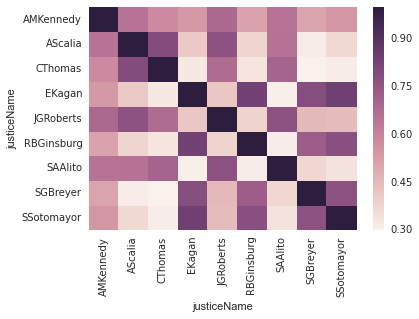

In [244]:
sns.heatmap(df[ df['justiceName'].isin(recent_judges) & (df['decisionDirection'].isin([1,2])) ].pivot_table('direction','docket','justiceName').corr())

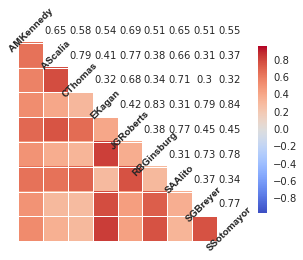

In [243]:
sns.corrplot(dfp, annot=True)

In [13]:
df = pd.read_csv('SCDB_2015_01_justiceCentered_LegalProvision.csv')

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [31]:
#df_facts['docket_number']

In [37]:
#df['docketId1']=df['docketId'].str.slice(start=5)

In [44]:
len( pd.merge(df,df_facts,left_on='docket',right_on='docket_number') )

49548

In [49]:
print len(df[df['term']>1994])
print len(df_facts[df_facts['year']>1994])

20244
1674


In [90]:
collections.Counter(" ".join(df_facts["facts2"]).split()).most_common(200)

[('court', 6764),
 ('district', 2782),
 ('federal', 1937),
 ('appeals', 1865),
 ('state', 1611),
 ('circuit', 1318),
 ('u.s.', 1157),
 ('act', 1123),
 ('supreme', 1095),
 ('held', 1078),
 ('filed', 991),
 ('argued', 757),
 ('found', 734),
 ('united', 672),
 ('new', 663),
 ('states', 661),
 ('violated', 655),
 ('trial', 630),
 ('case', 623),
 ('denied', 606),
 ('law', 590),
 ('would', 580),
 ('could', 572),
 ('section', 566),
 ('jury', 564),
 ('granted', 539),
 ('suit', 533),
 ('amendment', 518),
 ('ruled', 513),
 ('two', 511),
 ('sued', 504),
 ('police', 479),
 ('government', 473),
 ('evidence', 463),
 ('affirmed', 450),
 ('convicted', 446),
 ('first', 437),
 ('v.', 427),
 ('also', 420),
 ('right', 411),
 ('claims', 405),
 ('court,', 399),
 ('decision', 395),
 ('rights', 395),
 ('appealed', 393),
 ("court's", 388),
 ('judge', 385),
 ('one', 381),
 ('court.', 381),
 ('tax', 377),
 ('claim', 375),
 ('statute', 363),
 ('motion', 357),
 ('reversed', 354),
 ('dismissed', 352),
 ('appeal,', 

In [79]:
stop = stopwords.words('english')
df_facts['facts1']=df_facts['facts_of_the_case'].apply(lambda x: [item.lower() for item in x.split() if item.lower() not in stop])

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  from IPython.kernel.zmq import kernelapp as app


In [88]:
df_facts['facts2']=df_facts['facts1'].apply(lambda x: ' '.join(x))

In [82]:
df_facts['facts1']

0     [food, drug, administration, ("fda"), fired, k...
1     [nelson,, member, communist, party,, convicted...
2     [judson, griffin, james, crenshaw, indicted, a...
3     [residing, airbase, england, military, depende...
4     [1944,, united, states, army, private, albert,...
5     [clinton, jencks,, union, leader,, charged, fa...
6     [august, 12,, 1954,, agents, federal, bureau, ...
7                                          [available.]
8     [andrew, mallory, arrested, federal, officers,...
9     [roth, operated, book-selling, business, new, ...
10    [new, york, state, law, authorized, legal, cou...
11    [rev., martin, luther, king,, jr., led, boycot...
12    [1954,, john, watkins,, labor, organizer,, cal...
13    [alberts, conducted, mail-order, business, sol...
14    [fourteen, leaders, communist, party, state, c...
...
2471    [police, entered, gregory, welch’s, apartment,...
2472    [several, prisoners, housed, special, manageme...
2473    [mhn, government, services, (mhn

In [73]:
df_facts['facts_of_the_case'].values

array([ 'The Food and Drug Administration ("FDA") fired Kendrick Cole when it determined that his employment was not "clearly consistent with the interests of national security." Mr. Cole was a food and drug inspector and a "preference-eligible veteran," but was charged with having "a close association with individuals reliably reported to be Communists." Mr. Cole appealed his discharge to the Civil Service Commission, which denied his appeal, finding that the Veterans\' Preference Act did not afford Mr. Cole a right of appeal under the circumstances. Mr. Cole brought an action seeking declaratory judgment in the District of Columbia federal district court alleging that his discharge was invalid and that the Civil Service Commission improperly denied his appeal. The district court dismissed the case and the U.S. Court of Appeals for the District of Columbia affirmed.',
       "Nelson, a member of the Communist Party, was convicted of violating the Pennsylvania Sedition Act. This Act wa

In [59]:
vect= CountVectorizer()
X = vect.fit_transform(df_facts['facts_of_the_case'].values)
word_counts =pd.DataFrame(X.todense(),columns = vect.get_feature_names()).T.sum(axis=1)
word_counts.sort(ascending=False)
word_counts[:3]

the    35182
of     14069
to     11011
dtype: int64